## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv' , sep = ';')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# here have 294478
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
mean_converted = df.converted.mean()
print(mean_converted)
print('{:.0%}'.format(mean_converted)) # to show mean as perecentage
#(df.converted == 1).mean()


0.11965919355605512
12%


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
dff = df.query('landing_page == "old_page" and group == "treatment"')['user_id'].count() #1965
dfff = df.query('landing_page == "new_page" and group == "control"')['user_id'].count() #1928
print(dff + dfff) # 3893


3893


f. Do any of the rows have missing values?

**in this dataset don't have any missing values**

In [7]:
df.isnull().values.sum() #0
df.isnull().values.any() # False

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

here only use the rows that we can feel confident in the accuracy of the data.
I handled them  by delet and assinge into df2 

In [8]:
df_1 = df.query('landing_page == "old_page" and group == "control"') 
df_2 = df.query('landing_page == "new_page" and group == "treatment"')
df2 = df_1.append(df_2, ignore_index=True)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2['user_id'].nunique() #290584

290584

b. There is one **user_id** repeated in **df2**.  What is it?

**Yes, 1 row is duplicated**

In [11]:
df2['user_id'].duplicated()
sum(df2['user_id'].duplicated())
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
146678,773192,55:59.6,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
146212,773192,37:58.8,treatment,new_page,0
146678,773192,55:59.6,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2 = df2.drop(146212)
#df2.drop_duplicates('user_id', keep='first')
sum(df2.duplicated()) # to ensure  removede the row duplicated 
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,864975,52:26.2,control,old_page,1
3,936923,20:49.1,control,old_page,0
4,719014,48:29.5,control,old_page,0


In [14]:
df2.user_id.duplicated().sum()

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2['converted'].mean()


0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:

df2.query('group == "control" ')['converted'].mean() 


0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
df2.query('group == "treatment" ')['converted'].mean() 
#p_treatment_converted = treatment_converted / converting_1
#p_treatment_converted

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
#here size new_page dived on size all count of df2
df2.size #1452925
df2.query('landing_page == "new_page" ').size / df2.size #0.5001

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**here  notice there is no significant difference  between probability of old_page they converted in the `control` group and probability of new_page  in ' treatment' group , where  `control` group : 0.1204  and  ' treatment' group : 0.1188. so, here we are not sure this is not significant change. To help us for the change significant or not we will do hypothesis test.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Hypothesis test**

H_0: **$p_{old}$** >= **$p_{new}$**


H_1: **$p_{old}$** < **$p_{new}$**


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
Pnew = df2['converted'].mean()
Pnew

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
Pold = df2['converted'].mean()
Pold

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
# number of sample for new
n_new = df2.query('group == "treatment" ')['user_id'].count()
n_new 

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [22]:
# number of sample for old
n_old= df2.query('group == "control" ')['user_id'].count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
#Simulate for test of size new page
new_page_converted = np.random.choice([0,1] , size = n_new , p =[Pnew , (1-Pnew)])
new_page_converted.size

145310

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
#Simulate for test of size old page
old_page_converted = np.random.choice([0,1] , size = n_old , p =[Pold , (1-Pold)])
old_page_converted.size

145274

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:

p_diff = new_page_converted.mean()-old_page_converted.mean()
p_diff

0.00023615080576067093

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [26]:
# bootstrapping to Simulate 10,000
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0,1] , size = n_new , p =[Pnew , (1-Pnew)])
    old_page_converted = np.random.choice([0,1] , size = n_old , p =[Pold , (1-Pold)])
    diff =new_page_converted.mean()- old_page_converted.mean()
    # append 
    p_diffs.append(diff)   

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0, 0.5, 'count')

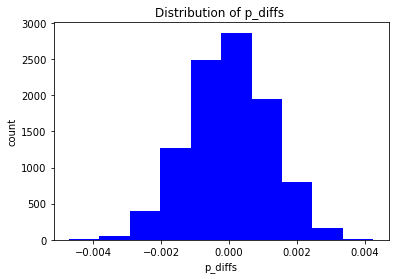

In [27]:
# Create hist and choose color
plt.hist(p_diffs, color = 'b')
 
# Add title and axis names
plt.title('Distribution of p_diffs ')
plt.xlabel('p_diffs')
plt.ylabel('count')
# here Closer to normal distribution

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
# here actual difference from actual data
diff2 = df2.query('group == "treatment" ').converted.mean()-df2.query('group == "control" ').converted.mean()
diff2

-0.0015782389853555567

Text(0, 0.5, 'count')

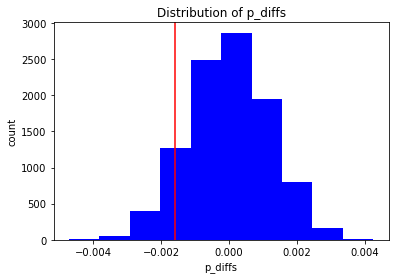

In [29]:
plt.hist(p_diffs, color = 'b')
plt.axvline(diff2 , color = 'r')
# Add title and axis names
plt.title('Distribution of p_diffs')
plt.xlabel('p_diffs')
plt.ylabel('count')


In [30]:
p_diffs = np.array(p_diffs)
(diff2<p_diffs).mean()
# here p-value

0.9048

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**In j we  represent by  normal distrbution and  calculated 'P-Value' , depended on Solution above we faild reject null hypothesis H_0 because here  p-value = 0.9105 not the biggest than 0.95 or less than 0.05  , so if we enable to reject null hypothesis must p_value > 0.95 or  p_value < 0.05**


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" and converted == 1')['user_id'].size
convert_new = df2.query('landing_page == "new_page" and converted == 1')['user_id'].size
n_old = df2.query('group == "control"')['user_id'].size
n_new = df2.query('group == "treatment"')['user_id'].size
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [32]:
# referens from this https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html
z_score , p_value = sm.stats.proportions_ztest([convert_old,convert_new], [n_old,n_new] , alternative = 'smaller' )
p_value , z_score

(0.9050583127590245, 1.3109241984234394)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**by used z-score is statistical test that measures the extent of change between them. If p-value > 0.95 or p-value< 0.05. so here also we couldn't reject null hypothesis H_0.
yes, they agree with part I**


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**here we perform logistic regression becaues the target 'converted' is Categorical data  it have two values conveted or not ( 0 and 1)**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
df2['intercept'] = 1
df2[['treatment', 'control']] = pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,treatment,control
0,851104,11:48.6,control,old_page,0,1,1,0
1,804228,01:45.2,control,old_page,0,1,1,0
2,864975,52:26.2,control,old_page,1,1,1,0
3,936923,20:49.1,control,old_page,0,1,1,0
4,719014,48:29.5,control,old_page,0,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [34]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'treatment']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 18 Nov 2020   Pseudo R-squ.:               8.077e-06
Time:                        03:40:00   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0038      0.008   -247.146      0.000      -2.020      -1.988
treatment      0.0150      0.011      1.311      0.190      -0.007       0.037
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

 **here p-value = 0.190 and part II p-value = 0.90 
 yes we have different between them , becuese part II one side test and here in this part two sides test with intercept.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**we can considering other factors, maybe use 'timestamp' if split to years and months, days. Then apply test and see treatment if bigger or less than control.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion? Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

**here no significant difference appeared on conversion, analysis below depicts this. which we did dummy variables becaues we have Categorical data**

In [36]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,treatment,control
user_id,,,,,,,,
834778,UK,08:43.3,control,old_page,0,1,1,0
928468,US,44:16.4,treatment,new_page,0,1,0,1
822059,UK,04:14.7,treatment,new_page,1,1,0,1
711597,UK,14:24.8,control,old_page,0,1,1,0
710616,UK,14:44.0,treatment,new_page,0,1,0,1


In [37]:
#here we konw values country col
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [38]:
### Create the necessary dummy variables
df_new['intercept'] = 1
#'CA' as the baseline
df_new[['US', 'UK']] = pd.get_dummies(df_new['country'])[['US', "UK"]]
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,treatment,control,US,UK
user_id,,,,,,,,,,
834778,UK,08:43.3,control,old_page,0,1,1,0,0,1
928468,US,44:16.4,treatment,new_page,0,1,0,1,1,0
822059,UK,04:14.7,treatment,new_page,1,1,0,1,0,1
711597,UK,14:24.8,control,old_page,0,1,1,0,0,1
710616,UK,14:44.0,treatment,new_page,0,1,0,1,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [39]:
logit_mod2 = sm.Logit(df_new['converted'], df_new[['intercept','US' ,'UK']])
results2 = logit_mod2.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [40]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 18 Nov 2020   Pseudo R-squ.:               1.521e-05
Time:                        03:40:03   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0408      0.027      1.518      0.129      -0.012       0.093
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

**here the p-value for UK better than US this indicates in UK more converted people. Also, here the p-value is not less than 5% must be less to reject null hypoeseis H_0. so , here still we fail to reject the null hypothesis H_0 because countries It did not affect much.**

In [41]:
df_new['US_new'] = df_new['US'] * df_new['treatment']
df_new['UK_new'] = df_new['UK'] * df_new['treatment']

In [42]:
logit_mod3 =sm.Logit(df_new['converted'], df_new[['intercept','US' ,'UK','US_new','UK_new']])
results3 = logit_mod2.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [43]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 18 Nov 2020   Pseudo R-squ.:               1.521e-05
Time:                        03:40:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0408      0.027      1.518      0.129      -0.012       0.093
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions
**we are doing this analysis to help the company if they should implement the new page design or not by apply testing.
After we did many testing on data we found that the old page was better than the new page because we cann't reject null hypoeseis H_0.**
